![](https://i.imgur.com/qkg2E2D.png)

# UnSupervised Learning Methods

## Exercise 003 - Part II

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 0.1.000 | 23/05/2023 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/UnSupervisedLearningMethods/2023_03/Exercise0002Part002.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import fetch_openml, load_breast_cancer, load_digits, load_iris, load_wine

# Computer Vision

# Miscellaneous
import os
import math
from platform import python_version
import random
import time
import urllib.request
from scipy.sparse.linalg import eigsh, svds
#import torchvision


# Typing
from typing import Callable, List, Tuple, Union

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
# from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

In [2]:
# Configuration
%matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [3]:
# Constants

DATA_FILE_URL   = r'None'
DATA_FILE_NAME  = r'None'

T_MNIST_IMG_SIZE = (28, 28)


In [4]:
# Auxiliary Functions

def BalancedSubSample( dfX: pd.DataFrame, colName: str, numSamples: int ):
    
    # TODO: Validate the number of samples
    # TODO: Validate the column name (Existence and categorical values)
    return dfX.groupby(colName, as_index = False, group_keys = False).apply(lambda dfS: dfS.sample(numSamples, replace = False))

## Guidelines

 - Fill the full names and ID's of the team members in the `Team Members` section.
 - Answer all questions / tasks within the Jupyter Notebook.
 - Use MarkDown + MathJaX + Code to answer.
 - Verify the rendering on VS Code.
 - Submission in groups (Single submission per group).
 - You may and _should_ use the forums for questions.
 - Good Luck!

* <font color='brown'>(**#**)</font> The `Import Packages` section above imports most needed tools to apply the work. Please use it.
* <font color='brown'>(**#**)</font> You may replace the suggested functions to use with functions from other packages.
* <font color='brown'>(**#**)</font> Whatever not said explicitly to implement maybe used by a 3rd party packages.
* <font color='brown'>(**#**)</font> The total run time of this notebook must be **lower than 60 [Sec]**.

## Generate / Load Data

In [5]:
# Download Data
# This section downloads data from the given URL if needed.

if (DATA_FILE_NAME != 'None') and (not os.path.exists(DATA_FILE_NAME)):
    urllib.request.urlretrieve(DATA_FILE_URL, DATA_FILE_NAME)

## 3. PCA

### 3.1. PCA Algorithm

In this section we'll implement a SciKit Learn API compatible class for the PCA.  
The class should implement the following methods:

1. `__init____()` - The object constructor by the encoder dimension.  
2. `fit()` - Given a data set builds the encoder / decoder.  
3. `transform()` - Applies the encoding on the input data.  
4. `inverse_transform()` - Applies the decoding on the input data.  

* <font color='brown'>(**#**)</font> You may use the [SciKit Learn's PCA module](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) as a reference.
* <font color='brown'>(**#**)</font> Both encoding and decoding applied as out of sample encoding / decoding.
* <font color='brown'>(**#**)</font> Pay attention to data structure (`N x D`).


In [6]:
import scipy


class PCA:
    def __init__(self, d: int = 2):
        '''
        Constructing the object.
        Args:
            d - Number of dimensions of the encoder output.
        '''
        #===========================Fill This===========================#
        # 1. Keep the model parameters.

        self.d = d
        self.vMean = None
        self.mUd = None
        #===============================================================#
        
    def fit(self, mX: np.ndarray):
        '''
        Fitting model parameters to the input.
        Args:
            mX - Input data with shape N x D.
        Output:
            self
        '''
        #===========================Fill This===========================#
        # 1. Build the model encoder.
        # 2. Build the model decoder.
        # 3. Optimize calculation by the dimensions of `mX`.
        # !! You may find `scipy.sparse.linalg.svds()` useful.
        # !! You may find `scipy.sparse.linalg.eigsh()` useful.
        vMean = mX.mean(axis=0)
        self.vMean = vMean
        mX = mX - vMean
        if mX.shape[0] > mX.shape[1]:
            cov_matrix = np.cov(mX.T, bias=True)
            eigenvalues, eigenvectors = eigsh(cov_matrix, k=self.d)
            idx = eigenvalues.argsort()[::-1] 
            self.mUd = eigenvectors[:,idx]
        else:
            eigenvalues, eigenvectors = eigsh(mX @ mX.T, k=self.d)
            idx = eigenvalues.argsort()[::-1] 
            eigenvectors = eigenvectors[:,idx]
            eigenvalues = eigenvalues[idx]
            eigenvalues = np.sqrt(eigenvalues)
            sigma = np.linalg.inv(eigenvalues * np.eye(self.d))
            f= np.dot(eigenvectors.T, mX)
            self.mUd = np.dot(sigma, f).T
        return self
    
    # def fit(self, mX: np.ndarray):
    #     '''
    #     Fitting model parameters to the input.
    #     Args:
    #         mX - Input data with shape N x D.
    #     Output:
    #         self
    #     '''
    #     #===========================Fill This===========================#
    #     # 1. Build the model encoder.
    #     # 2. Build the model decoder.
    #     # 3. Optimize calculation by the dimensions of `mX`.
    #     # !! You may find `scipy.sparse.linalg.svds()` useful.
    #     # !! You may find `scipy.sparse.linalg.eigsh()` useful.
    #     vMean = mX.mean(axis=0)
    #     self.vMean = vMean
    #     mX = mX - vMean
    #     if mX.shape[0] > mX.shape[1]:
    #         cov_matrix = np.cov(mX.T, bias=True)
    #         eigenvalues, eigenvectors = eigsh(cov_matrix, k=self.d)
    #         idx = eigenvalues.argsort()[::-1] 
    #         self.mUd = eigenvectors[:,idx]
    #     else:
    #         s, v = svds(mX, k=self.d, return_singular_vectors='vh')
    #         idx2 = s.argsort()[::-1] 
    #         self.mUd = v[idx2,:].T
    
    #     #===============================================================# 
    #     return self
    
    def transform(self, mX: np.ndarray) -> np.ndarray:
        '''
        Applies (Out of sample) encoding
        Args:
            mX - Input data with shape N x D.
        Output:
            mZ - Low dimensional representation (embeddings) with shape N x d.
        '''
        #===========================Fill This===========================#
        # 1. Encode data using the model encoder.
        # return (mX - np.atleast_1d(self.vMean)) @ self.mUd
        
        mZ = (mX-np.atleast_1d(self.vMean)) @ self.mUd
        #===============================================================#

        return mZ
    
    def inverse_transform(self, mZ: np.ndarray) -> np.ndarray:
        '''
        Applies (Out of sample) decoding
        Args:
            mZ - Low dimensional representation (embeddings) with shape N x d.
        Output:
            mX - Reconstructed data with shape N x D.
        '''
        #===========================Fill This===========================#
        # 1. Encode data using the model decoder.
        # return (mZ @ self.mUd.T) + np.atleast_1d(self.vMean)
        
        mX = mZ @ self.mUd.T + np.atleast_1d(self.vMean)
        #===============================================================#

        return mX


* <font color='red'>(**?**)</font> In the class we use _out of sample_ encoding / decoding. What if we use the same `mX` for training and the encoding?  
Make sure to understand this before proceeding.

### 3.2. PCA Application

In this section the PCA (Using the above class) will be applied on several data sets:

 * Breast Cancer Dataset - Loaded using `load_breast_cancer()`.
 * Digits Dataset - Loaded using `load_digits()`.
 * Iris Dataset - Loaded using `load_iris()`.
 * Wine Dataset - Loaded using `load_wine()`.

For each data set:

1. Make yourself familiar with the data set:
    * How many features are there ($D$).
    * How many samples are there ($D$).
    * Do all features have the same unit?
2. Apply a Pre Process Step  
   In ML, usually, if the features do not have the same unit they are normalized.  
   Namely, make each feature with zero mean and unit standard deviation.   
   Write a function to normalize input data.
3. Apply the PCA  
   Set `d` to be visualization friendly and apply PCA from $D$ to $d$.  
   The obtained the low dimensional data represents $\boldsymbol{Z} \in \mathbb{R}^{d \times N}$.
4. Plot Low Dimensional Data  
   Make a scatter plot of $\boldsymbol{Z} \in \mathbb{R}^{d \times N}$ and color the data points according to the data labels.  
   For each data set show result with the normalization step and without it.
5. Calculate Lost Energy  
   For each plot, show the value of ${\left\| \tilde{\boldsymbol{X}} - \boldsymbol{X} \right\|}_{F}^{2}$.  
   Do this by applying `inverse_transform()` on the low dimensional data and calculate the norm.


* <font color='brown'>(**#**)</font> Pay attention to the difference in dimensions of the data to the derived Math formulations.
* <font color='brown'>(**#**)</font> The output should be 2 figures for each data set. You may show them in a single plot using sub plots.

In [7]:
#===========================Fill This===========================#
def NormalizeData(mX: np.ndarray) -> np.ndarray:
    '''
    Normalize data so each feature has zero mean and unit standard deviation.
    Args:
        mX  - Input data with shape N x d.
    Output:
        mY  - Output data with shape N x d.
    Remarks:
        - Features with zero standard deviation are not scaled (Only centered).
    '''
    mY = mX.copy()
    mean = mY.mean(axis=0)
    std = mY.std(axis=0)
    mY = mY - mean
    mY[:, std!=0] /= std[std!=0]

    return mY
#===============================================================#

In [8]:
#===========================Fill This===========================#
# 1. Set parameter `d`.
# 2. Load each data set.
# 3. Apply PCA to each data set with and without normalization.
# 4. Display results as scatter data.
d = 2
Breast_Cancer_Dataset = load_breast_cancer()
Digits_Dataset = load_digits()
Iris_Dataset =load_iris()
Wine_Dataset = load_wine()
datasets = {"Breast Cancer": Breast_Cancer_Dataset,"Digits": Digits_Dataset, "Iris": Iris_Dataset,"Wine": Wine_Dataset}


#===============================================================#

In [9]:
for name, dataset in datasets.items():
    print(f'{name}: -- number of samples: {dataset.data.shape[0]}, number of features: {dataset.data.shape[1]}')

Breast Cancer: -- number of samples: 569, number of features: 30
Digits: -- number of samples: 1797, number of features: 64
Iris: -- number of samples: 150, number of features: 4
Wine: -- number of samples: 178, number of features: 13


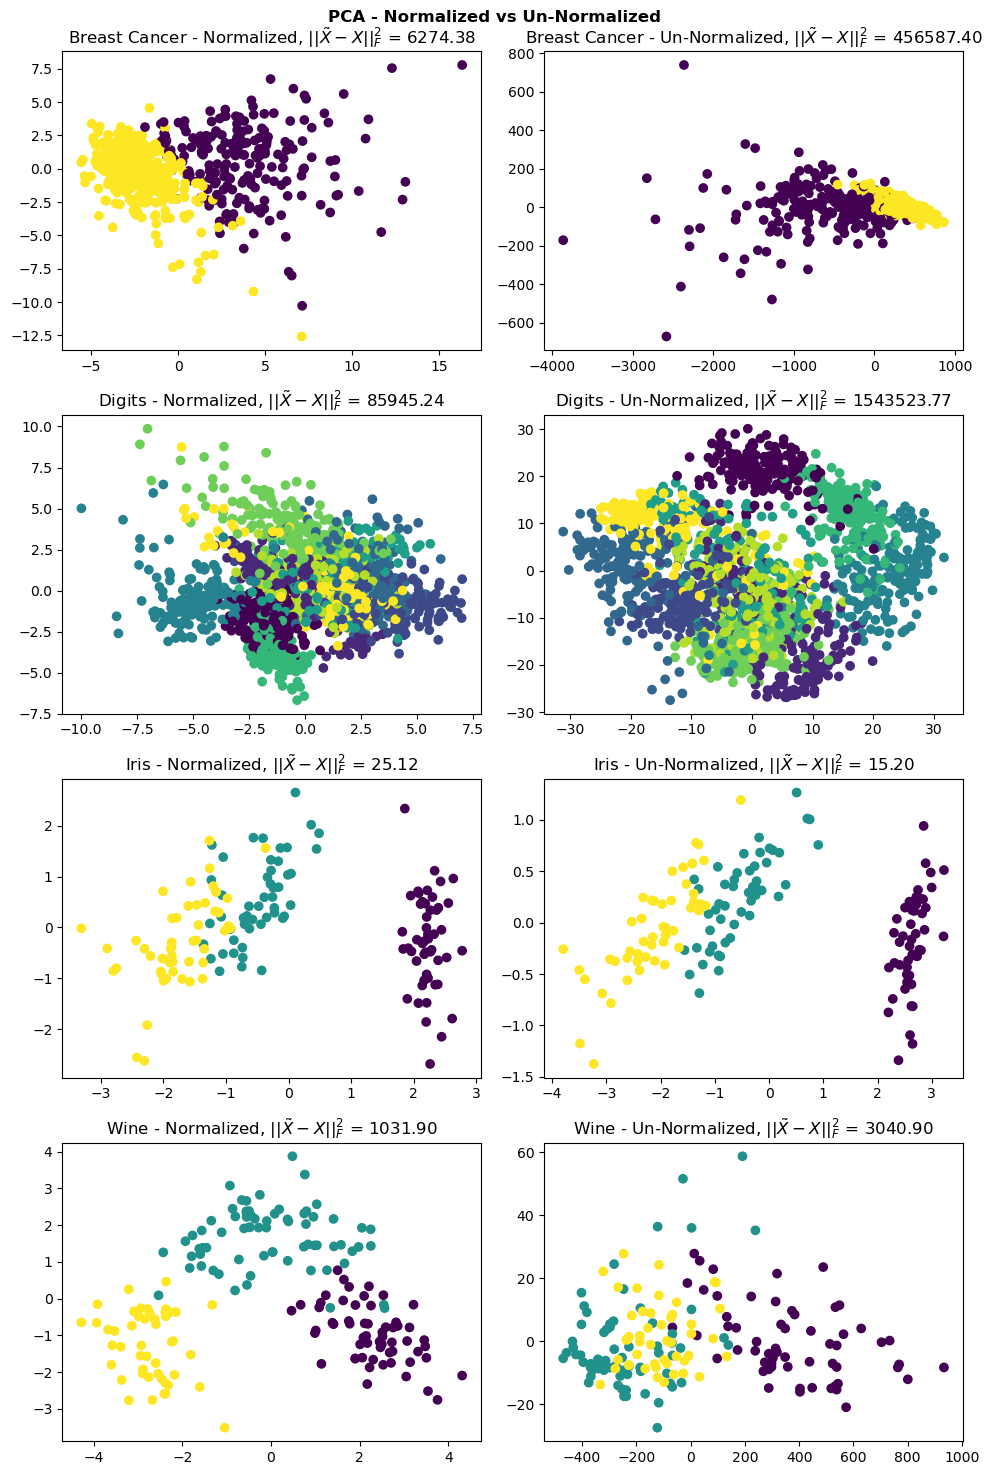

In [10]:
fig, axes = plt.subplots(len(datasets),2, figsize=(10, 15))
pca = PCA(d=d)
plt.suptitle('PCA - Normalized vs Un-Normalized', weight='bold')
for i, (name, dataset) in enumerate(datasets.items()):
    data_normalized = NormalizeData(dataset.data)
    pca.fit(data_normalized)
    normalized_transformed = pca.transform(data_normalized)
    normalized_inverse = pca.inverse_transform(normalized_transformed)
    normalized_error =  scipy.linalg.norm(normalized_inverse-data_normalized)**2
    axes[i,0].scatter(normalized_transformed[:,0], normalized_transformed[:,1], c=dataset.target, label=dataset.target)
    axes[i,0].set_title(f"{name} - Normalized, " + r'${||\tilde{X} - {X}||}_{F}^{2}$' + f' = {normalized_error:0.2f}')

    pca.fit(dataset.data)
    transformed = pca.transform(dataset.data) 
    inverse = pca.inverse_transform(transformed)
    inverse_error =  scipy.linalg.norm(inverse-dataset.data)**2
    axes[i,1].scatter(transformed[:,0], transformed[:,1], c=dataset.target, label=dataset.target)
    axes[i,1].set_title(f"{name} - Un-Normalized, " + r'${||\tilde{X} - {X}||}_{F}^{2}$' + f' = {inverse_error:0.2f}')

plt.tight_layout()

### 3.3. Question

In the above, why does the results of the normalized and non normalized data are different?  
Address the geometry of the results and the value of the reconstruction error.

### 3.3. Solution
Normalization is important in PCA since it is a variance maximizing method. It projects your original data onto directions which maximize the variance. When the data is not normalized the features with high arbitrary nominal variance will dominate and the PC's will be defined by them.  Geometrically, the PCA choose the PC by maximizing the distance of the projected data onto the PC from the origin. Thus, when the data is not scaled, the maximum distance will be skewed towards features with the most nominal variance, resulting with PC's that do not truly explain the variance of the data. 
Note that if the features have aready the same scale we should avoid scaling.  it is o.k that the selected PCs are affected by features with high variance. Scaling is preformed  to avoid the effect of a feature with high variance due to its absolute big values. If PCA would would have used correlation instead of covariance matrix, then there would not be an issue as correlations is scaled. In our case we shoulds avoid scaling for the digits datasert as al features are ofthe same scale.  

Recostruction error:
Note that we can not compare between norm of the reconstructed error of normalized and unnormalized due to the different scaling.
if we do want to compare between the reconstruction errors  we should for  example scale the error by the mean of the data

## 4. Image Denoising

In this section the PCA algorithm will be used for denoising images from the [MNIST Dataset](https://en.wikipedia.org/wiki/MNIST_database).  
In this section:

 1. Load Data  
    Load the MNIST data set and sub sample it.  
    We'll have a perfectly balanced data set.
    The data will be in `mX` and labels in `vY`.  
    This is already implemented.
 2. Add Noise  
    We'll add noise to the data.  
    The noise of the data will be modeled as a Poisson Noise (Also known as [_Shot Noise_](https://en.wikipedia.org/wiki/Shot_noise)).  
    The _Shot Noise_ is a classic model of noise gathered by imaging sensors.
 3. Analyze the Data  
    Analyze the spectrum of the data and choose an appropriate ste of parameters for denoising.
 3. Apply Denoising  
    Apply denoising by utilizing the PCA algorithm.
 4. Analyze Result  
    Show the results as a function of the parameters.

In [11]:
# Parameters
numSamplesClass = 600
λ               = 35

In [12]:
# Load Data
#dfX, dfY = fetch_openml(name = 'mnist_784', version = 1, return_X_y = True, as_frame = True, parser = 'auto')
dfX, dfY = fetch_openml(name = 'mnist_784', version = 1, return_X_y = True, as_frame = True)


In [13]:
# Sub Sample Data
dfData = pd.concat((dfX, dfY), axis = 1)

# Balanced Sub Sample
# End Result: 'numSamplesClass' samples per digit
dfData = BalancedSubSample(dfData, 'class', numSamplesClass)
vY = dfData['class'].to_numpy(dtype = np.uint8)
mX = dfData.drop(columns = ['class']).to_numpy()

In [14]:
# Add Poisson Noise
mN = np.random.poisson(λ, size = mX.shape) #<! Noise samples

In [15]:
# Add Noise
# Make sure values are in {0, 1, 2, ..., 255} range
mXRef = mX.copy() #<! Reference with no noise
mXRef = mXRef / 255

mX += mN
mX = np.minimum(mX, 255)


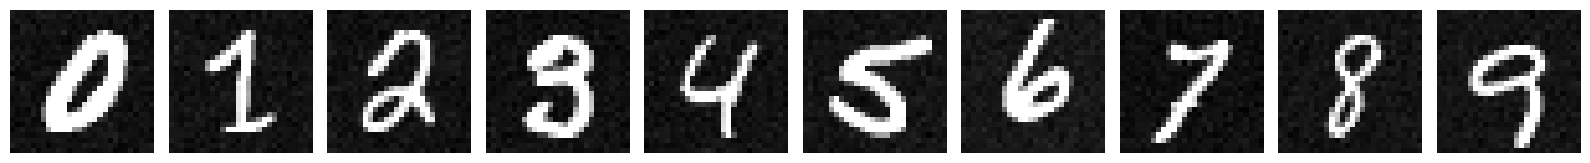

In [16]:
# Show Samples

lIdx = [np.flatnonzero(vY == ii)[0] for ii in range(10)]

_, mHA = plt.subplots(1, 10, figsize = (16, 4))
for ii, hA in enumerate(mHA.flat):
    idx = lIdx[ii]
    mI  = np.reshape(mX[idx], T_MNIST_IMG_SIZE)
    # mI  = np.clip(mI, 0, 1)
    hA.imshow(mI, cmap = 'gray')
    hA.axis('off')
    
plt.tight_layout()
plt.show()

### 4.1. The Data Spectrum

In this section:

 1. Pre Process the data (Optional).  
    Do this step if oyu think it is needed.
 2. Plot the Spectrum of the Eigen Values of the data.
 3. Choose **a range** (5 values) of `d` for the low dimensionality reduction.
 4. For each `d` value, calculate the **relative energy loss**.


In [17]:
#===========================Fill This===========================#
# 1. Pre Process Data (Optional).
# !! Make sure to keep the name of the data `mX`.
# !! Don't change the order of the data so it matches `vY`.
mX = (mX - mX.min())/(mX.max()-mX.min())

#===============================================================#

In [18]:
#===========================Fill This===========================#
# 1. Calculate the spectrum of the Eigen Values of the data.
cov_matrix = np.cov(mX.T, bias=True)
eigenvalues = scipy.linalg.eigh(cov_matrix, eigvals_only=True)
eigenvalues[::-1].sort()
eigenvalues /= eigenvalues.sum()


#===============================================================#

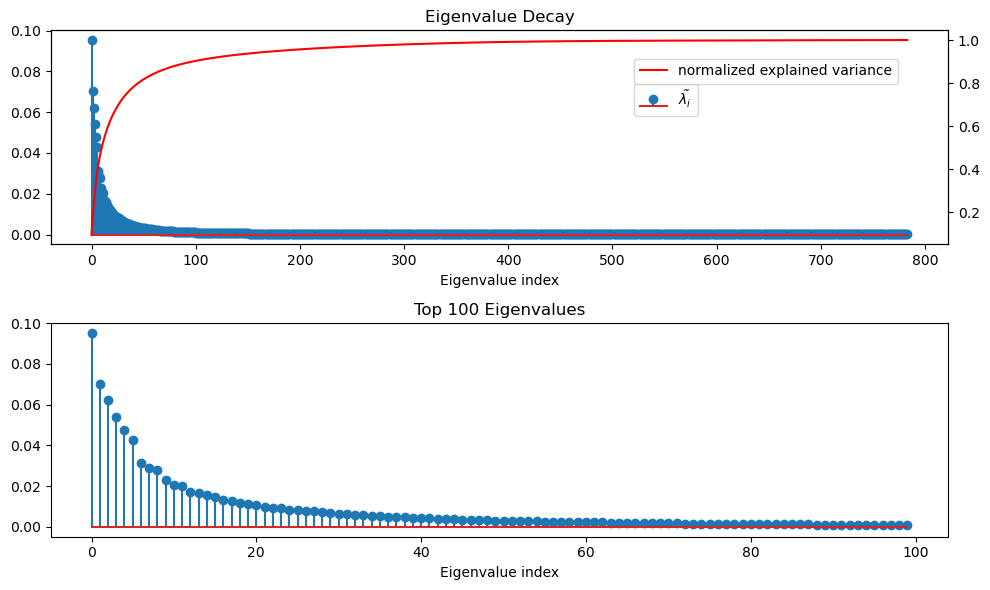

In [19]:
#===========================Fill This===========================#
# 1. Display the Spectrum.
# !! You may show both the spectrum and the relative energy.
fig, ax = plt.subplots(2,1, figsize= (10,6))
ax[0].set_title("Eigenvalue Decay")
ax[0].set_xlabel('Eigenvalue index')
ax2 = ax[0].twinx()
# ax.set_xlim(0, eigenvalues.shape[0])
# p1 = ax.bar(range(eigenvalues.shape[0]), eigenvalues, color='r', width=3, label = r'$\tilde{\lambda_{i}}$')
p1 = ax[0].stem(eigenvalues, label = r'$\tilde{\lambda_{i}}$')
p2 = ax2.plot(range(eigenvalues.shape[0]), np.cumsum(eigenvalues), color='r', label= "normalized explained variance")
ax[0].legend(loc = (0.65, 0.6))
ax2.legend(loc=(0.65, 0.75))
ax[1].stem(eigenvalues[:100], label = r'$\tilde{\lambda_{i}}$')
ax[1].set_title("Top 100 Eigenvalues")
ax[1].set_xlabel('Eigenvalue index')
plt.tight_layout()
plt.show();

#===============================================================#

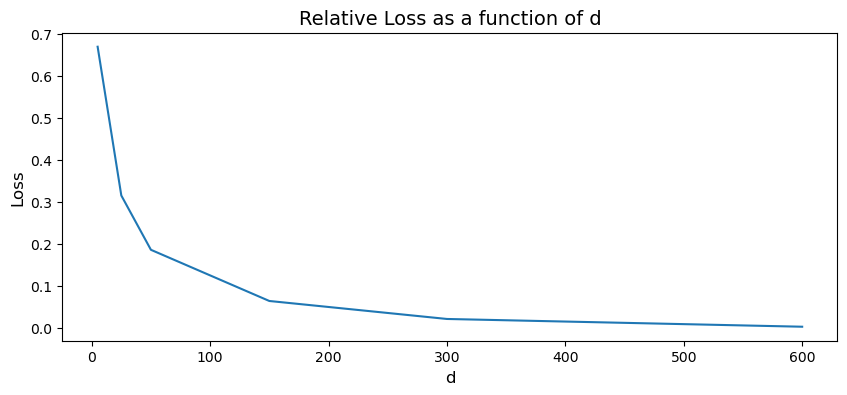

In [20]:
#===========================Fill This===========================#
# 1. Choose a range of `d` values.
# 2. Per `d` plot / display the relative energy loss.
# !! Don't choose too many, keep running time and visualization reasonable.
# !! The choice should be in order to show the effect of `d` on the results and not only the optimal `d`.
ds= [5, 25, 50, 150, 300, 600]
loss = list(map(lambda x: 1-eigenvalues[:x].sum(), ds))
fig, ax = plt.subplots(figsize= (10,4))
ax.set_title("Relative Loss as a function of d", size=14)
ax.set_xlabel("d", size=12)
ax.set_ylabel("Loss", size=12)
ax.plot(ds, loss);

#===============================================================#

### 4.2. PCA Based Denoising

In this section, per `d` value:

 1. Build the _Encoder_ and _Decoder_. 
 2. Denoise the images listed in the index list `lIdx`.
 3. Show results per `d`
      * For each image show the reconstruction error vs. the noisy sample (`mX`).
      * For each image show the estimation error vs. the non noisy sample (`mXRef`).

* <font color='brown'>(**#**)</font> Make sure when you use the whole data (`mX`) and when the sub set to analyze.
* <font color='brown'>(**#**)</font> For the PCA you may only use `mX`.
* <font color='brown'>(**#**)</font> The output should be the 10 images per row where the number of rows is the number of `d` values + 2 (For the reference / noisy images).

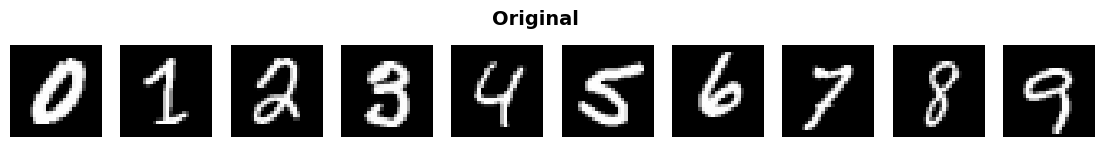

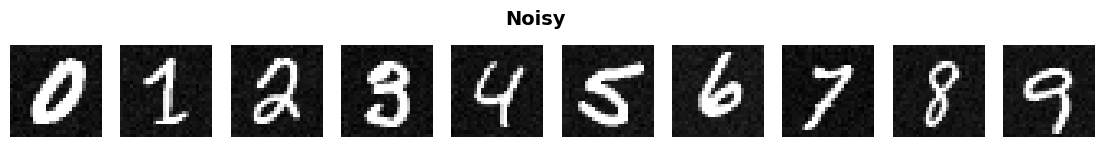

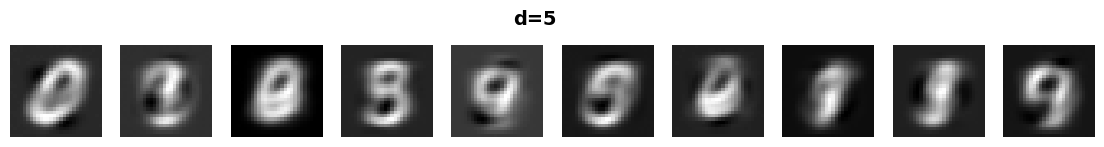

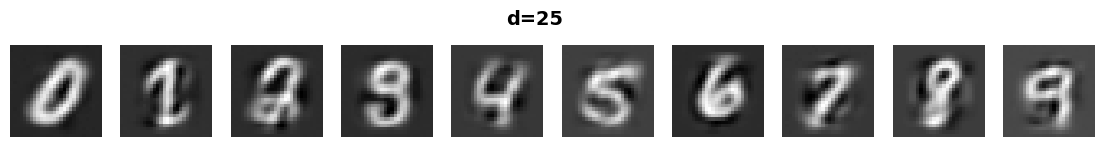

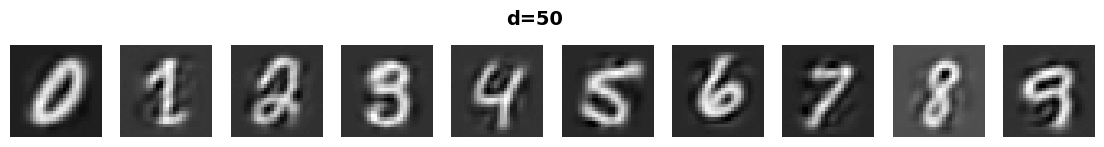

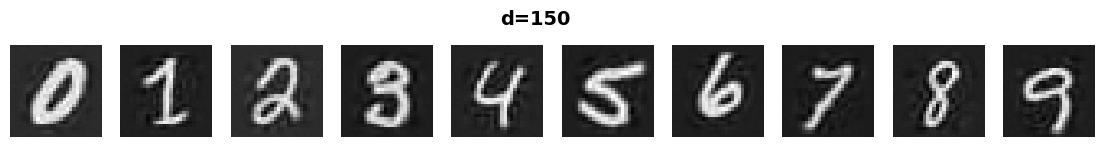

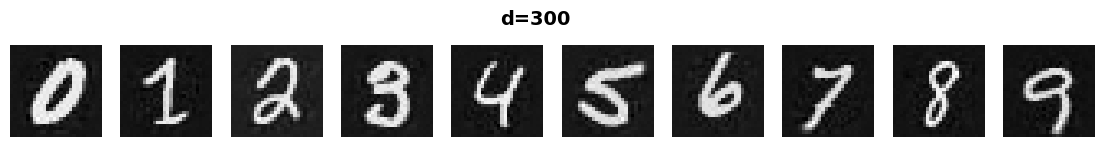

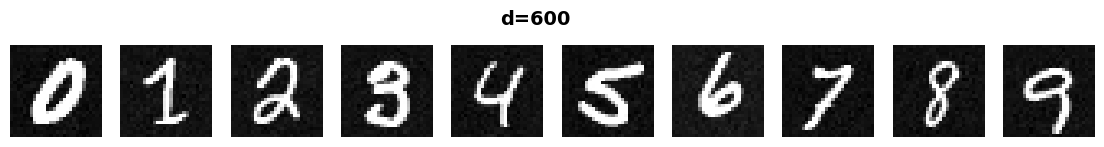

In [21]:
#===========================Fill This===========================#
# 1. Build the encoder / decoder using the `PCA` class above.
# 2. Per `d` denoise the images in `lIdx`.
# !! Only use `mX` for the PCA step.

# 1. Create a subplot of `len(d) + 2 x 10` plots.
# 2. In the 1st row, show the clean images (`mXRef`).
# 3. In the 2nd row, show the noisy images (`mX`).
# 4. In the next rows show the sample per different `d`.  
#    Per row, show `d`.

def show_digits(data, title, digits=False):
    _, mHA = plt.subplots(1, 10, figsize = (14, 4))
    plt.suptitle(title,y=0.7, size=14, weight="bold")
    for ii, hA in enumerate(mHA.flat):
        idx = lIdx[ii]
        if digits:
            idx = ii
        mI  = np.reshape(data[idx], T_MNIST_IMG_SIZE)
        hA.imshow(mI, cmap = 'gray')
        hA.axis('off')

reconstruction_error_df = pd.DataFrame()
estimation_error_df = pd.DataFrame()
image_idx = np.arange(10)
show_digits(mXRef, 'Original')
show_digits(mX, f'Noisy')
for d in ds:
    pca = PCA(d=d)
    pca.fit(mX)
    transformed = pca.transform(mX)
    inversed = pca.inverse_transform(transformed[lIdx])
    reconstruction_error = scipy.linalg.norm(inversed - mX[lIdx], axis=1)**2
    df = pd.DataFrame({"index": image_idx, "dimensions": np.full(10,d), "error": reconstruction_error})
    reconstruction_error_df = pd.concat([reconstruction_error_df, df])
    estimation_error = scipy.linalg.norm(inversed - mXRef[lIdx], axis=1)**2
    df = pd.DataFrame({"index": image_idx, "dimensions": np.full(10,d), "error": estimation_error})
    estimation_error_df = pd.concat([estimation_error_df, df])
    show_digits(inversed, f'd={d}', digits=True)        
plt.show();  


#===============================================================#

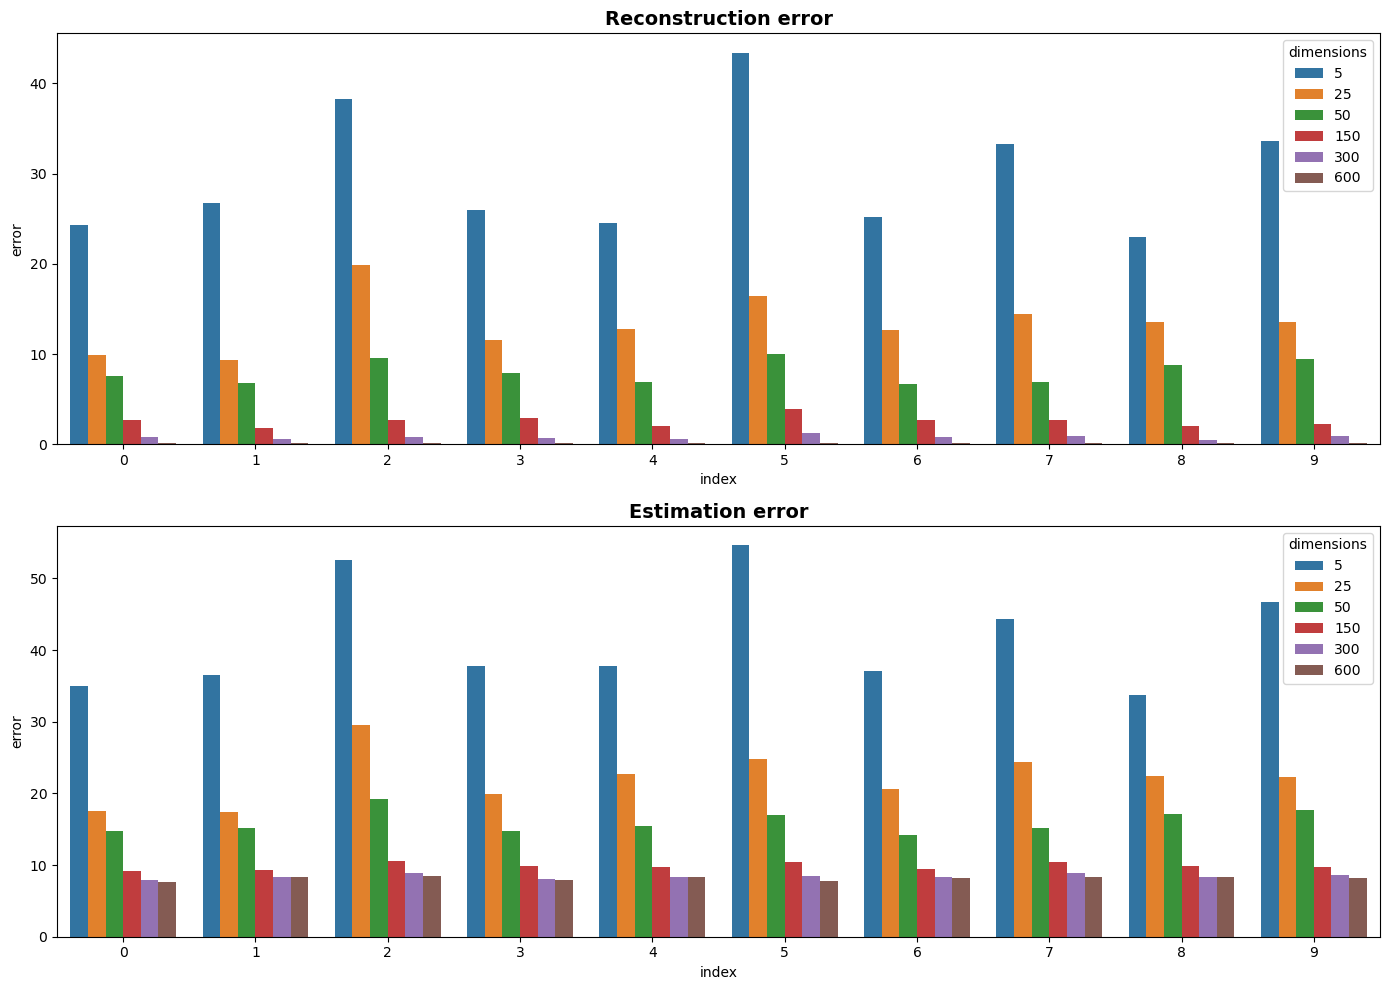

In [22]:
#===========================Fill This===========================#
# 1. Create 2 sub plots where the `x` is the image index {0, 1, ..., 9}.
# 2. The 1st plot, per `d`, shows the reconstruction error.
# 3. The 2nd plot, per `d`, shows the estimation error.

fig, ax = plt.subplots(2, 1, figsize = (14,10))
ax[0].set_title("Reconstruction error", size=14, weight="bold")
ax[1].set_title("Estimation error", size=14, weight="bold")
sns.barplot(data=reconstruction_error_df, x="index", y="error", hue="dimensions", ax=ax[0])
sns.barplot(data=estimation_error_df, x="index", y="error", hue="dimensions", ax=ax[1])
plt.tight_layout()
plt.show();

#===============================================================#

### 4.3. Question

Address the following remarks:

 - How does the noise model effect the performance of the denoising?  
   Specifically, if the noise model was Gaussian with the same variance, what would change?
 - Would you use the reconstruction error as an estimation of the estimation error?
 - Explain the idea behind the PCA denoising.  
   Specifically address the trade off between small and large values of `d`.
 - If the data was 1D, would you expect it to perform better?  
   Think if the model has any knowledge about the data being 2D.

### 4.3. Solution

1. The distribution of noise in an image can have an impact on the performance of PCA denoising, if the noise distribution deviates significantly from a Gaussian distribution, the performance of PCA denoising may be affected. When the noise in the image follows a Gaussian distribution, PCA is well-suited for denoising as  <b> Gaussian noise has a symmetric distribution  and provides uncorrelated noise. Our Poission distribution is also uncorrealted . For large Lambda the Poisson is fairly symmetric around its mean (Lambda)
    
    To further Analysis Gaussian noise vs Poisson noise, we have plotted the variance per PC (eigen values) for a synthetic data that is only noise. We can see that for 6000 samples and 64 features the project variance distribution over the PCs is mostly similar for both noises leading to the same SNR after PCA denoising. Note that the projection curve  is not 100% flat as we are estimating the autocorrelation function from samples. for enough samples, the autocorrelation function will reach a delta function leading to a flat curve after projection.

   
2. No. If we use the reconstructor error as an estimated error we can conclude on a wrong  optimal "d". As we increase the number of dimensions the reconstructor error decrease however at some "d" the estimator error will not decrease (and even may increase). This is because the variance of the original data is not uniformly distributed over all the PCs while the noise variance is normality distributed over all the PCs.
    
    
3. PCA denoising exploits the fact that noise in images tends to be random and uncorrelated, while the important information in an image is often correlated and exhibits patterns. The principal components capture the most significant variations in the image dataset. These components represent the patterns and structures present in the image, while noise is typically spread out across multiple components and contributes less to the overall variance. By retaining the principal components with the highest eigenvalues, we can focus on the informative components and suppress the noise. if we plot the variance of the (clean) data for each PC we will see that it decreases (sometimes exponentially) with the number of PCs. However, the noise variance will (mostly)  be flat over all PCs.   This behaviour enables the option for an optimal "d". We would look for the minimum "d" that captures most the signals (uncordiality with noise) and cut the rest which leads to cutting mostly only noise.  Al assumes high SNR.
    
    
4. No it should perform the same. The primary advantage of PCA lies in its ability to separate the noise component from the underlying structure, regardless dimensionality. PCA would identify the dominant principal components that capture the most important information and suppress the noise component and <b>does not take into account spatial information during the process.




<b>A few  more observations from the above plots:

For specific “d” different digits have a different reconstructor error.  This means that some digits have more patterns then the other and we need less dimensions to represent them. This raises the option to do a PCA model per digits if labels are known and select a different optimized "d" (for denoising )  per label  
    
We can see that from some "d" while the reconstructed error is decreased the estimated error is not. As explained above we are adding more noise than original signal information leading to lower SNR for the reconstructed image.

---

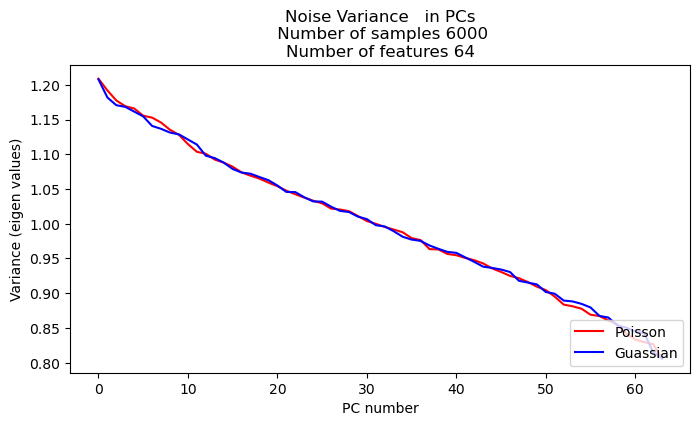

In [24]:
from sklearn.decomposition import PCA

number_samples     = 6000
number_of_features = 64 
mN_poisson = np.random.poisson(1 , size = (number_samples,number_of_features)) #<! Noise samples
mN_normal  = np.random.normal( scale = 1 , size =  (number_samples,number_of_features)) 

transformer_poisson = PCA(n_components=number_of_features)
X_transformed_poisson = transformer_poisson.fit_transform(mN_poisson)
X_hat_poisson         = transformer_poisson.inverse_transform(X_transformed_poisson)

poisson_var = transformer_poisson.explained_variance_

transformer_normal = PCA(n_components=number_of_features)
X_transformed_normal = transformer_normal.fit_transform(mN_normal)
X_hat_normal         = transformer_normal.inverse_transform(X_transformed_normal)
normal_var           = transformer_normal.explained_variance_

fig, ax = plt.subplots(figsize=(8, 4))
                    
ax.set_title(f'Noise Variance   in PCs\n Number of samples {number_samples}\nNumber of features {number_of_features}')
ax.set_xlabel('PC number')
ax.set_ylabel('Variance (eigen values)')
ax.plot(poisson_var , label =  'Poisson' , color = 'red')
ax.plot(normal_var , label =  'Guassian' , color = 'blue')


ax.legend(loc = 'lower right')

### 4.4. PCA Denoising with Labels

In the above we used no knowledge on the label of the image.  
In this section you should use the labels information in order to improve results.

 1. Write a code which take advantage of the labels `vY` (Be creative).
 2. Show the plots of the reconstruction and estimation error.
 3. Explain, in words, your idea.
 4. Explain, in words, the results.

#### Solution:
We can train the model each time on the data filtered to a specific digit. This way the PCA is provided with data that is more structured and correlated, enabling the PCA screen out the noise with more ease. 
As expected, it can be noticed from the results bellow, the reconstruction and the estimation error are both lower when using the 'supervised' method compared with the 'unsupervised' for each one of the digits

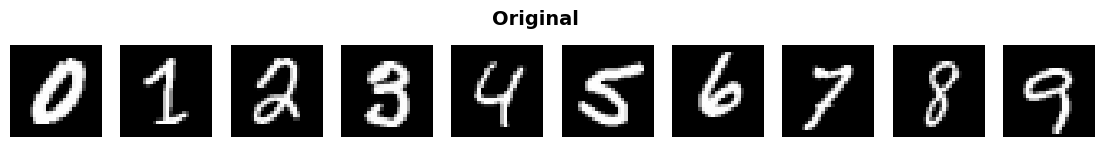

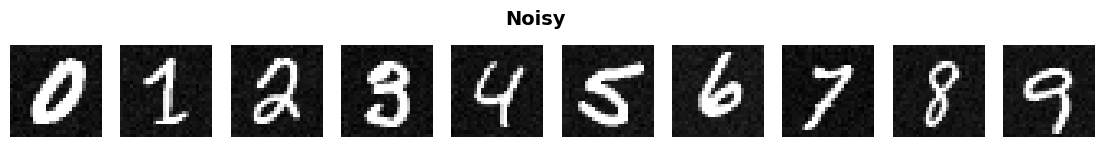

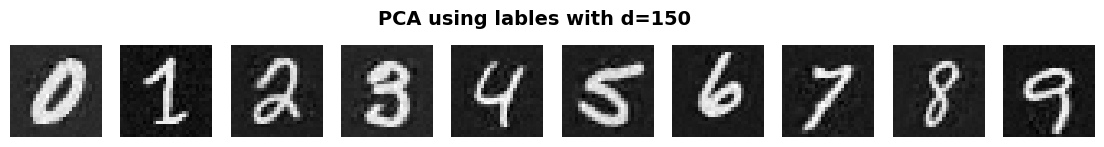

In [25]:
#===========================Fill This===========================#
# 1. Choose the maximum `d` used in the previous section.
# 2. Apply PCA Denoising on the list of images.
d= 150
show_digits(mXRef, 'Original')
show_digits(mX, f'Noisy')
_, mHA = plt.subplots(1, 10, figsize = (14, 4))
plt.suptitle(f"PCA using lables with d={d}",y=0.7, size=14, weight="bold")
reconstruction_error = []
estimation_error = []
for ii, hA in enumerate(mHA.flat):
    pca = PCA(d=d)
    mX_digit = mX[vY==ii]
    pca.fit(mX_digit)
    transformed = pca.transform(mX_digit)
    inversed = pca.inverse_transform(transformed)
    reconstruction_error.append(scipy.linalg.norm(inversed[0] - mX[lIdx[ii]])**2)
    estimation_error.append(scipy.linalg.norm(inversed[0] - mXRef[lIdx[ii]])**2)
    mI  = np.reshape(inversed[0], T_MNIST_IMG_SIZE)
    hA.imshow(mI, cmap = 'gray')
    hA.axis('off')
#===============================================================#

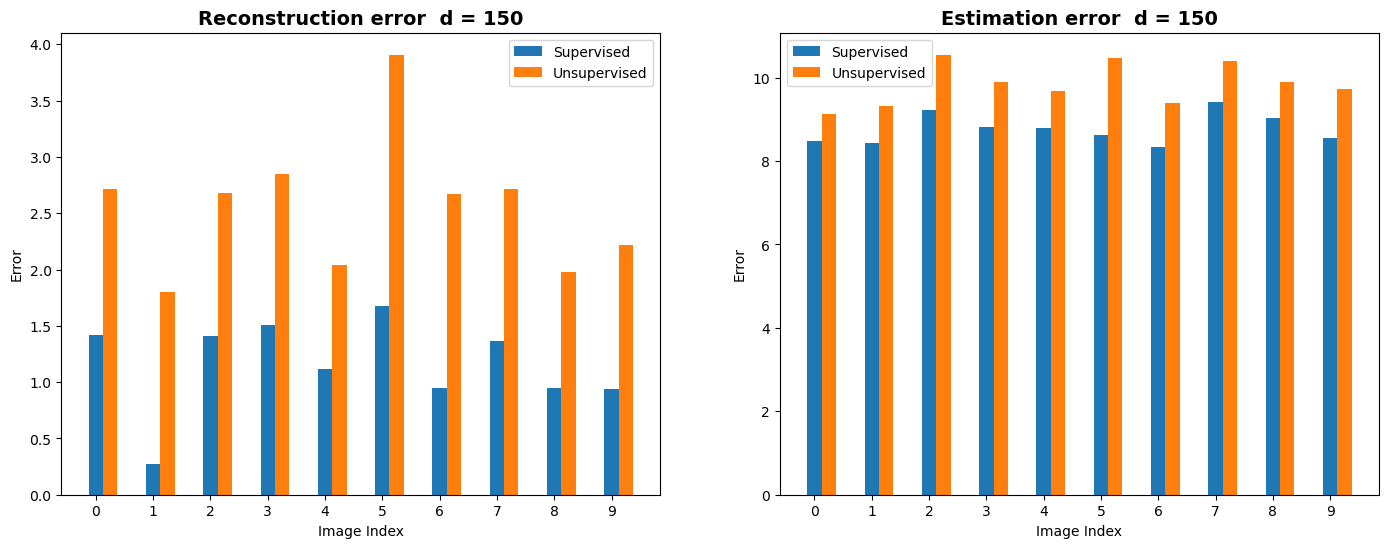

In [26]:
#===========================Fill This===========================#
# 1. Display the reconstruction and estimation error per image.
# 2. Compare to the previous result for the same `d`.

fig, ax = plt.subplots(1,2, figsize = (17, 6))
ax[0].bar(image_idx, reconstruction_error, width=0.25, label="Supervised")
ax[0].bar(image_idx+0.25, reconstruction_error_df.loc[reconstruction_error_df["dimensions"]==150, "error"],width=0.25,  label="Unsupervised")
ax[0].set_xticks(image_idx)
ax[0].set_xlabel("Image Index")
ax[0].set_ylabel("Error")
ax[0].legend()
ax[1].bar(image_idx, estimation_error, width=0.25, label="Supervised")
ax[1].bar(image_idx+0.25, estimation_error_df.loc[estimation_error_df["dimensions"]==150, "error"],width=0.25,  label="Unsupervised")
ax[1].set_xticks(image_idx)
ax[1].set_xlabel("Image Index")
ax[1].set_ylabel("Error")
ax[1].legend()
ax[0].set_title(f'Reconstruction error  d = {d}' , size=14, weight="bold")
ax[1].set_title(f'Estimation error  d = {d}', size=14, weight="bold")
plt.show()
#===============================================================#

<b>Explanation  of our  idea and the results:  

Using the labels, we preform dedicated PCA per each one of the digits.  When preforming a single PCA over all the data we  average the correlations between the dimensions. When preforming PCA per digit there is more correlation (structure) hence more variance is located in less dimensions. 
As observed by the above plots the reconstruction error for PCA per label is reduced.  
Note that we checked for d= 150 however per label PCA enable the option to optimize the d per digit.
    
When we preform PCA per label we use less data. That is the empiric correlation of the noise is expected to be higher (if we have sufficient data per label this is expected to be negligible )  however the overall gain of the approach  is higher
